# Quantum Mechanics Analysis (not in scale)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, eigh_tridiagonal
from scipy.integrate import simps
# %matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as subplt

Schrodinger equation in 1D:
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E \psi(x) $$

In [2]:
hcut = 1
mass = 1  # INPUT

## Potentials
Select a suitable potential and 'Run' only that desired potential.

### Potential Well:
$$ V(x) = -V_0 \quad ; \quad -\frac{a}{2}<x<\frac{a}{2} $$
$$ = 0 \quad ; \quad otherwise $$

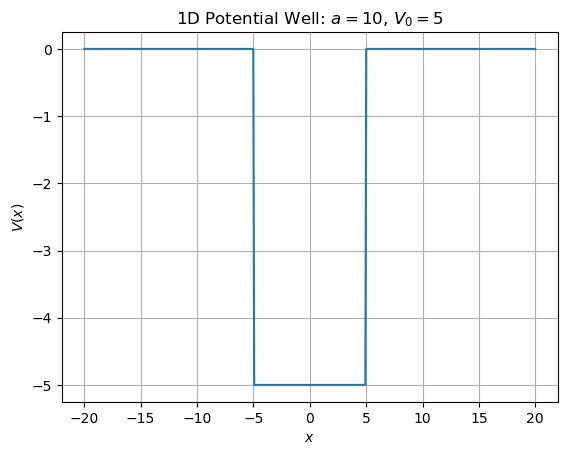

In [64]:
L = 20
x_min, x_max = -L, L
N = 500  # no. of grid points
x = np.linspace(x_min, x_max, N) # x axis

# potential
def potential1d(x, a, V0):
    return np.array([-V0 if -a/2<i<a/2 else 0 for i in x])

a1, V01 = 10, 5 # INPUT
Vx = potential1d(x=x, a=a1, V0=V01)
plt.plot(x, Vx)
plt.title(f'1D Potential Well: $a={a1}$, $V_0={V01}$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

### Barrier Potential:
$$ V(x) = V_0 \quad ; \quad -\frac{a}{2}<x<\frac{a}{2} $$
$$ = 0 \quad ; \quad otherwise $$

In [ ]:
L = 20
x_min, x_max = -L, L
N = 200  # no. of grid points
x = np.linspace(x_min, x_max, N) # x axis

# potential
def potential1d(x, a, V0):
    return np.array([V0 if -a/2<i<a/2 else 0 for i in x])

a1, V01 = 10, 5 # INPUT
Vx = potential1d(x=x, a=a1, V0=V01)
plt.plot(x, Vx)
plt.title(f'Barrier Potential: $a={a1}$, $V_0={V01}$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

### Multiple Barriers:
Barrier height = $V_0$.

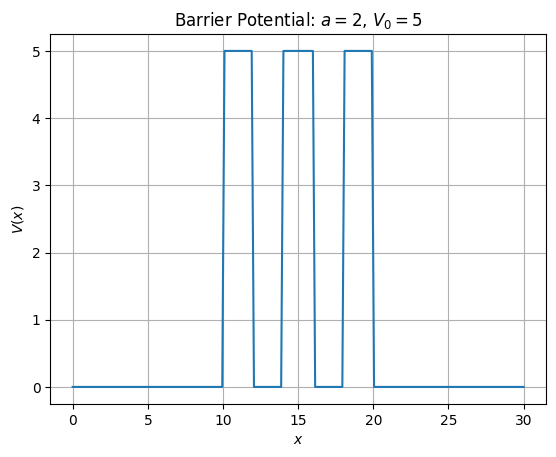

In [3]:
L = 30
x_min, x_max = 0, L
N = 200  # no. of grid points
x = np.linspace(x_min, x_max, N) # x axis

# potential
def potential1d(x, a, V0):
    # return np.array([V0 if a<i<2*a else 0 for i in x])
    pt = []
    for i in x:
        if 5*a<i<6*a:
            pt.append(V0)
        elif 7*a<i<8*a:
            pt.append(V0)
        elif 9*a<i<10*a:
            pt.append(V0)
        else:
            pt.append(0)
    return np.array(pt)

a1, V01 = 2, 5 # INPUT
Vx = potential1d(x=x, a=a1, V0=V01)
plt.plot(x, Vx)
plt.title(f'Barrier Potential: $a={a1}$, $V_0={V01}$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

### Multiple Barriers:
Barrier height = $V_0$, number of barriers = $N_{barr}$.

### 1D LHO Potential:
$$ V(x) = \frac{1}{2} m\omega^2 x^2 $$

In [64]:
L = 10
x_min, x_max = -L, L
N = 100  # no. of grid points
x = np.linspace(x_min, x_max, N) # x axis

# potential
def potential1d(x, omega):
    return 0.5*mass*(omega**2)* x**2

omega1 = 1 # INPUT
Vx = potential1d(x=x, omega=omega1)

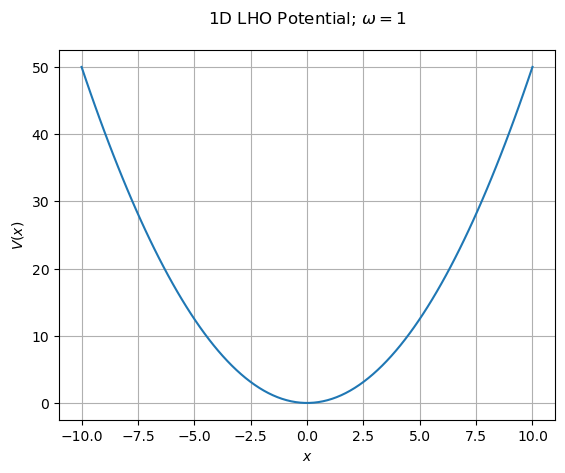

In [65]:
plt.plot(x, Vx)
plt.title(f'1D LHO Potential; $\omega={omega1}$\n')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

### Nuclear Potential:
Potential depth = $V_0$, Potential height = $V_c$, Amomic no. = $Z$, Atomic mass no. = $A$. All the contants are inserted randomly.

In [ ]:
L = 30
x_min, x_max = 0, L
N = 200  # no. of grid points
x = np.linspace(x_min, x_max, N) # x axis

# potential
R0 = 1.2
ep0 = 0.08   # permittivity
qe = 1.6  # electronic charge
def potential1d(r, Z, A, V0):
    R = R0 * A**(1/3)
    pt = []
    for i in r:
        if 0<=i<R:
            pt.append(V0)
        else:
            Vcoulomb = 2*Z*qe**2/(4*np.pi*ep0*i)
            pt.append(Vcoulomb)
    return np.array(pt)

Z1, A1, V01, Vc1 = 92, 235, -36, 25     # INPUT
Vx = potential1d(r=x, Z=Z1, A=A1, V0=V01)
plt.plot(x, Vx)
plt.title(f'Nuclear Potential: $Z={Z1}$, $A={A1}$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

### Potential 1:
$$ V(x) = k |x| $$

In [ ]:
L = 10
x_min, x_max = -L, L
N = 200  # no. of grid points
x = np.linspace(x_min, x_max, N) # x axis

# potential
def potential1d(x, k):
    return k* np.abs(x)

k1 = 1 # INPUT
Vx = potential1d(x=x, k=k1)
plt.plot(x, Vx)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

### Sinusoidal Potential:
$$ V(x) = A \sin(kx) $$

In [ ]:
L = 30
x_min, x_max = 0, L
N = 200  # no. of grid points
x = np.linspace(x_min, x_max, N) # x axis

# potential
def potential1d(x, A, k):
    return A* np.sin(k*x)

A1, k1 = 5, 1 # INPUT
Vx = potential1d(x=x, A=A1, k=k1)
plt.plot(x, Vx)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

## Plotting Wavefunction and Probability density

In [67]:
dx = x[1] - x[0]
T = (-hcut**2/(2*mass)) * (np.diag(-2/dx**2 * np.ones(N))
                        + np.diag(1/dx**2 * np.ones(N-1), 1)
                        + np.diag(1/dx**2 * np.ones(N-1), -1))
H = T + np.diag(Vx*np.ones(N))
eigenvals1, eigenvecsT1 = eigh(H)
# eigenvecsT1m2 = eigenvecsT1.conjugate()*eigenvecsT1
def eig_val(n):
    return eigenvals1[n]
def eig_vec(n):
    eigf = eigenvecsT1[:, n]
    eigfm2 = eigf.conjugate()*eigf
    eigf = eigf/simps(eigfm2, x)**0.5
    return eigf
def prob_den(n):
    igv = eigenvals1[n]
    eigf = eigenvecsT1[:, n]
    eigfm2 = eigf.conjugate()*eigf
    eigf = eigf/simps(eigfm2, x)**0.5
    eigfm2 = eigf.conjugate()*eigf
    return eigfm2

n = 5   # INPUT

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Vx, mode='lines', name='Potential'))
fig.add_trace(go.Scatter(x=x, y=eig_val(n)*np.ones(N), name=f'E{n}={eig_val(n):.5}'))
fig.show()

# Create subplots
fig = subplt.make_subplots(rows=1, cols=2, subplot_titles=[
    f'Eigenstate for n={n}, E_n={eig_val(n):.6f}',
    f'Probability density for n={n}, E_n={eig_val(n):.6f}'
])

# Define data for the first subplot
trace1 = go.Scatter(x=x, y=eig_vec(n), mode='lines', name='ψ_n(x)')

# Define data for the second subplot
trace2 = go.Scatter(x=x, y=prob_den(n), mode='lines', name='|ψ_n(x)|^2')

# Add traces to the subplots
fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)

# Update x-axis and y-axis labels
fig['layout']['xaxis1'].update(title='x')
fig['layout']['xaxis2'].update(title='x')
fig['layout']['yaxis1'].update(title='ψ_n(x)')
fig['layout']['yaxis2'].update(title='|ψ_n(x)|^2')

# Set the figure size
# fig['layout'].update(width=800, height=400)


# Show the plot
fig.show()


In [68]:
simps(prob_den(n), x)

0.9999999999999999

Wavefunctions

In [69]:
nmin, nmax = 2, 20  # INPUT

# Create a plot for the potential energy
fig_potential = go.Figure()
fig_potential.add_trace(go.Scatter(x=x, y=Vx, name='Potential'))
for i in range(nmin, nmax + 1):
    fig_potential.add_trace(go.Scatter(x=x, y=[eig_val(i)] * N, name=f'n={i}, E{i}={eig_val(i):.4}', line=dict(width=0.8)))

fig_potential.update_layout(title="Potential Energy and Energy Levels", xaxis_title="x", yaxis_title="Energy")
fig_potential.update_layout(legend=dict(x=0, y=1))
fig_potential.update_layout(height=600)
fig_potential.show()

# Create subplots for wavefunctions
rows = (nmax - nmin + 1) // 3 + 1
cols = min(nmax - nmin + 1, 3)
fig_wavefunctions = subplt.make_subplots(rows=rows, cols=cols, subplot_titles=[f'n={i}' for i in range(nmin, nmax + 1)])

for i in range(nmin, nmax + 1):
    row = (i - nmin) // 3 + 1
    col = (i - nmin) % 3 + 1
    fig_wavefunctions.add_trace(go.Scatter(x=x, y=eig_vec(i), name=f'ψ {i}', line=dict(width=1), showlegend=True), row=row, col=col)

fig_wavefunctions.update_xaxes(title_text="x")
fig_wavefunctions.update_yaxes(title_text="Wavefunction", row=1, col=1)
fig_wavefunctions.update_layout(title_text="Wavefunctions")
fig_wavefunctions.update_layout(height=1500)
fig_wavefunctions.show()


Probability Densities

In [70]:
nmin, nmax = 1, 18  # INPUT

# Create a plot for the potential energy
fig_potential = go.Figure()
fig_potential.add_trace(go.Scatter(x=x, y=Vx, name='Potential'))
for i in range(nmin, nmax + 1):
    fig_potential.add_trace(go.Scatter(x=x, y=[eig_val(i)] * N, 
                                name=f'n={i}, E{i}={eig_val(i):.4}', line=dict(width=0.6)))

fig_potential.update_layout(title="Potential Energy and Energy Levels", 
                            xaxis_title="x", yaxis_title="Energy")
fig_potential.update_layout(legend=dict(x=0, y=1))
fig_potential.update_layout(height=600)
fig_potential.show()

# Create subplots for probability densities
rows = (nmax - nmin + 1) // 3 + 1
cols = min(nmax - nmin + 1, 3)
fig_probabilities = subplt.make_subplots(rows=rows, cols=cols, 
                                        subplot_titles=[f'n={i}' for i in range(nmin, nmax + 1)])

for i in range(nmin, nmax + 1):
    row = (i - nmin) // 3 + 1
    col = (i - nmin) % 3 + 1
    fig_probabilities.add_trace(go.Scatter(x=x, y=prob_den(i), name=f'|ψ {i}|2', 
                                        line=dict(width=1), showlegend=True), row=row, col=col)

fig_probabilities.update_xaxes(title_text="x")
fig_probabilities.update_yaxes(title_text="Probability Density", row=1, col=1)
fig_probabilities.update_layout(title_text="Probability Densities")
fig_probabilities.update_layout(height=1500)
fig_probabilities.show()


## Superposition

Wavefunction

In [73]:
ns = np.array([5, 6, 7, 8, 9, 10])  # INPUT
cs = np.array([10, 6, 4, 5, 4, 7])   # INPUT
cs = cs / np.sum(cs**2)**0.5

# Create a figure for the superposing waves with labels
fig_superposing_waves = go.Figure()

for i in range(ns.size):
    psin = cs[i] * eig_vec(ns[i])
    fig_superposing_waves.add_trace(
                go.Scatter(x=x, y=psin, 
                name=f'ψ {ns[i]}, E{ns[i]}={eig_val(ns[i]):.4}, c{ns[i]}={cs[i]:.3f}', line=dict(width=0.7)))

fig_superposing_waves.update_layout(title="Superposing Waves", xaxis_title="x", yaxis_title="Wavefunction")
fig_superposing_waves.update_layout(legend=dict(x=0, y=1))
fig_superposing_waves.show()

# Create a figure for the final superposed wave
psis = eig_vec(0) * 0
for i in range(ns.size):
    psin = cs[i] * eig_vec(ns[i])
    psis += psin

fig_final_superposed_wave = go.Figure()
fig_final_superposed_wave.add_trace(go.Scatter(x=x, y=psis, name='ψ', line=dict(width=1)))

fig_final_superposed_wave.update_layout(title="Final Superposed Wave", xaxis_title="x", yaxis_title="Wavefunction")
fig_final_superposed_wave.update_layout(legend=dict(x=0, y=1))
fig_final_superposed_wave.show()


Probability Density

In [74]:
import numpy as np
import plotly.graph_objs as go

ns = np.array([15, 9, 7, 8, 3, 1])  # INPUT
cs = np.array([10, 6, 4, 5, 4, 7])   # INPUT
cs = cs / np.sum(cs**2)**0.5

# Create a figure for individual probability density plots with labels
fig_individual_prob_density = go.Figure()

for i in range(ns.size):
    psin = cs[i] * eig_vec(ns[i])
    prob_density = prob_den(ns[i])
    fig_individual_prob_density.add_trace(go.Scatter(x=x, y=prob_density, name=f'|ψ {ns[i]}|2, E{ns[i]}={eig_val(ns[i]):.4}, c{ns[i]}={cs[i]:.3f}', line=dict(width=0.7)))

fig_individual_prob_density.update_xaxes(title_text="x")
fig_individual_prob_density.update_yaxes(title_text="Probability Density")
fig_individual_prob_density.update_layout(title="Individual Probability Densities")
fig_individual_prob_density.show()

# Create a figure for the final superposed probability density plot
psis = eig_vec(0) * 0
for i in range(ns.size):
    psin = cs[i] * eig_vec(ns[i])
    psis += psin

fig_final_superposed_prob_density = go.Figure()
fig_final_superposed_prob_density.add_trace(go.Scatter(x=x, y=psis.conjugate()*psis, name='|ψ|2', line=dict(width=1)))

fig_final_superposed_prob_density.update_layout(title="Final Superposed Probability Density", xaxis_title="x", yaxis_title="Probability Density")
fig_final_superposed_prob_density.update_layout(legend=dict(x=0, y=1))
fig_final_superposed_prob_density.show()


In [75]:
simps(psis.conjugate()*psis, x)

1.0000000000000004

## Time Evolution